# notebook环境测试

In [1]:
print('hi')

hi


# 快速开始

In [2]:
%matplotlib notebook
import numpy as np
import pandas as pd
import  matplotlib.pyplot as plt


#  创建一个系列(series)

In [3]:
import numpy as np
import pandas as pd
s = pd.Series([1,3,5,np.nan,6,8])
print(s)

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64


# 创建一个DataFrame

In [4]:
dates = pd.date_range("20130101",periods=6)
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [5]:
df = pd.DataFrame(np.random.randn(6,4),index=dates,columns=list("ABCD"))
df
#np.random.randn函数是NumPy库中的一个函数，用于生成服从标准正态分布（均值为0，方差为1）的随机数。它返回一个具有指定形状的数组，数组中的每个元素都是从标准正态分布中独立抽取的随机数。

# 例如，如果你调用np.random.randn(2, 3)，它将返回一个形状为(2, 3)的数组，其中包含了2行3列共6个随机数，这些随机数都是从标准正态分布中独立抽取的。


,A,B,C,D
2013-01-01,1.227584,0.720448,-0.617471,-0.830742
2013-01-02,1.401910,-1.210431,-0.470935,1.400679
2013-01-03,-0.358583,-0.161886,0.051662,-0.675451
2013-01-04,-1.341813,-0.483354,-1.150010,0.561276
2013-01-05,-0.752501,0.846375,-1.516446,-0.985630
2013-01-06,0.391344,0.975057,-0.991658,0.807829


In [6]:
# 通过字典构造Dframe
df2 = pd.DataFrame(
    {
        "A":1.0,
        "B":pd.Timestamp("20130102"),
        "C":pd.Series(1,index=list(range(4)),dtype="float32"),
        "D":np.array([3]*4,dtype="int32"),
        #具体来说，np.array([3]*4, dtype="int32")的意思是创建一个长度为4的Python列表，列表中的每个元素都是3。然后，使用NumPy的np.array函数将这个列表转换为一个NumPy数组。
        "E":pd.Categorical(["test","train","test","train"]),
        "F":"foo",
    }
)
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


In [7]:
#查看类型
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

# 观察数据

In [8]:
df.head()

,A,B,C,D
2013-01-01,1.227584,0.720448,-0.617471,-0.830742
2013-01-02,1.401910,-1.210431,-0.470935,1.400679
2013-01-03,-0.358583,-0.161886,0.051662,-0.675451
2013-01-04,-1.341813,-0.483354,-1.150010,0.561276
2013-01-05,-0.752501,0.846375,-1.516446,-0.985630


In [9]:
df.head(2)

,A,B,C,D
2013-01-01,1.227584,0.720448,-0.617471,-0.830742
2013-01-02,1.401910,-1.210431,-0.470935,1.400679


In [10]:
df.tail(3)

,A,B,C,D
2013-01-04,-1.341813,-0.483354,-1.150010,0.561276
2013-01-05,-0.752501,0.846375,-1.516446,-0.985630
2013-01-06,0.391344,0.975057,-0.991658,0.807829


In [11]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [12]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

使用df.to_numpy将dataFrame 转换为一个numpy数组,**注意:转换后不含索引和列标题**

In [13]:
df.to_numpy()

array([[ 1.22758391,  0.72044776, -0.61747142, -0.83074213],
       [ 1.40190976, -1.21043107, -0.47093473,  1.40067925],
       [-0.35858254, -0.16188587,  0.05166238, -0.67545128],
       [-1.34181299, -0.48335373, -1.15000955,  0.56127612],
       [-0.75250076,  0.84637494, -1.5164457 , -0.98562954],
       [ 0.39134385,  0.97505718, -0.9916583 ,  0.80782863]])

In [14]:
df2.to_numpy()

array([[1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo']],
      dtype=object)

使用`describe()`来快速描述数据

In [15]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.094657,0.114368,-0.782476,0.046327
std,1.101545,0.875515,0.554549,1.003442
min,-1.341813,-1.210431,-1.516446,-0.985630
25%,-0.654021,-0.402987,-1.110422,-0.791919
50%,0.016381,0.279281,-0.804565,-0.057088
75%,1.018524,0.814893,-0.507569,0.746191
max,1.401910,0.975057,0.051662,1.400679


使用`df.T`来转换行和列

In [16]:
df.T

,2013-01-01,2013-01-02,2013-01-03,2013-01-04,2013-01-05,2013-01-06
A,1.227584,1.401910,-0.358583,-1.341813,-0.752501,0.391344
B,0.720448,-1.210431,-0.161886,-0.483354,0.846375,0.975057
C,-0.617471,-0.470935,0.051662,-1.150010,-1.516446,-0.991658
D,-0.830742,1.400679,-0.675451,0.561276,-0.985630,0.807829


使用`sort_index()`按照行或者列排序

In [17]:
df.sort_index(axis=1,ascending=False)

,D,C,B,A
2013-01-01,-0.830742,-0.617471,0.720448,1.227584
2013-01-02,1.400679,-0.470935,-1.210431,1.401910
2013-01-03,-0.675451,0.051662,-0.161886,-0.358583
2013-01-04,0.561276,-1.150010,-0.483354,-1.341813
2013-01-05,-0.985630,-1.516446,0.846375,-0.752501
2013-01-06,0.807829,-0.991658,0.975057,0.391344


In [18]:
df.sort_index(axis=0,ascending=False)

,A,B,C,D
2013-01-06,0.391344,0.975057,-0.991658,0.807829
2013-01-05,-0.752501,0.846375,-1.516446,-0.985630
2013-01-04,-1.341813,-0.483354,-1.150010,0.561276
2013-01-03,-0.358583,-0.161886,0.051662,-0.675451
2013-01-02,1.401910,-1.210431,-0.470935,1.400679
2013-01-01,1.227584,0.720448,-0.617471,-0.830742


In [19]:
df.sort_index(axis=0,ascending=True)

,A,B,C,D
2013-01-01,1.227584,0.720448,-0.617471,-0.830742
2013-01-02,1.401910,-1.210431,-0.470935,1.400679
2013-01-03,-0.358583,-0.161886,0.051662,-0.675451
2013-01-04,-1.341813,-0.483354,-1.150010,0.561276
2013-01-05,-0.752501,0.846375,-1.516446,-0.985630
2013-01-06,0.391344,0.975057,-0.991658,0.807829


In [20]:
df

,A,B,C,D
2013-01-01,1.227584,0.720448,-0.617471,-0.830742
2013-01-02,1.401910,-1.210431,-0.470935,1.400679
2013-01-03,-0.358583,-0.161886,0.051662,-0.675451
2013-01-04,-1.341813,-0.483354,-1.150010,0.561276
2013-01-05,-0.752501,0.846375,-1.516446,-0.985630
2013-01-06,0.391344,0.975057,-0.991658,0.807829


使用`sort_values()`来根据值排列

In [21]:
df.sort_values(by='B')

,A,B,C,D
2013-01-02,1.401910,-1.210431,-0.470935,1.400679
2013-01-04,-1.341813,-0.483354,-1.150010,0.561276
2013-01-03,-0.358583,-0.161886,0.051662,-0.675451
2013-01-01,1.227584,0.720448,-0.617471,-0.830742
2013-01-05,-0.752501,0.846375,-1.516446,-0.985630
2013-01-06,0.391344,0.975057,-0.991658,0.807829


这里是对这四个函数的解释和用法：

1. `DataFrame.at[]`：`at`函数用于通过标签（label）来访问和设置DataFrame中的单个元素。它的用法是`df.at[row_label, column_label]`，其中`row_label`是行的标签，`column_label`是列的标签。这个函数具有较高的性能，适用于快速访问和设置单个元素的场景。

示例用法：

```python
import pandas as pd

df = pd.DataFrame({'A': [1, 2, 3], 'B': [4, 5, 6]})
value = df.at[1, 'A']  # 访问第二行第一列的元素
df.at[2, 'B'] = 7  # 设置第三行第二列的元素为7
```

2. `DataFrame.iat[]`：`iat`函数用于通过整数位置（position）来访问和设置DataFrame中的单个元素。它的用法是`df.iat[row_index, column_index]`，其中`row_index`是行的整数位置，`column_index`是列的整数位置。与`at`函数类似，`iat`函数也具有较高的性能，适用于快速访问和设置单个元素的场景。

示例用法：

```python
import pandas as pd

df = pd.DataFrame({'A': [1, 2, 3], 'B': [4, 5, 6]})
value = df.iat[1, 0]  # 访问第二行第一列的元素
df.iat[2, 1] = 7  # 设置第三行第二列的元素为7
```

3. `DataFrame.loc[]`：`loc`函数用于通过标签（label）来访问和设置DataFrame中的行或列。它的用法是`df.loc[row_indexer, column_indexer]`，其中`row_indexer`和`column_indexer`可以是单个标签、标签列表、标签范围等。通过`loc`函数，你可以基于标签对DataFrame进行切片、选择行和列、进行布尔索引等操作。

示例用法：

```python
import pandas as pd

df = pd.DataFrame({'A': [1, 2, 3], 'B': [4, 5, 6], 'C': [7, 8, 9]})
subset = df.loc[1:2, ['A', 'B']]  # 选择第二行到第三行的'A'和'B'列
df.loc[0, 'C'] = 10  # 设置第一行的'C'列为10
```

4. `DataFrame.iloc[]`：`iloc`函数用于通过整数位置（position）来访问和设置DataFrame中的行或列。它的用法与`loc`函数相似，但是`iloc`使用整数位置而不是标签进行定位。通过`iloc`函数，你可以基于整数位置对DataFrame进行切片、选择行和列、进行布尔索引等操作。

示例用法：

```python
import pandas as pd

df = pd.DataFrame({'A': [1, 2, 3], 'B': [4, 5, 6], 'C': [7, 8, 9]})
subset = df.iloc[1:3, 0:2]  # 选择第二行到第三行的第一列到第二列
df.iloc[0, 2] = 10  # 设置第一行的第三列为10
```

总结起来，`at`和`iat`函数用于快速访问和设置单个元素，`loc`和`iloc`函数用于通过标签或整数位置对DataFrame进行切片、选择行和列等操作。其中，`at`和`iat`函数使用标签或整数位置定位单个元素，而`loc`和`iloc`函数可以使用标签范围、标签列表、整数范围、整数列表等进行定位。

# 获取数据和选择数据

In [22]:
df['A']

2013-01-01    1.227584
2013-01-02    1.401910
2013-01-03   -0.358583
2013-01-04   -1.341813
2013-01-05   -0.752501
2013-01-06    0.391344
Freq: D, Name: A, dtype: float64

In [23]:
#使用切片的方式获取数据
df[0:3]

,A,B,C,D
2013-01-01,1.227584,0.720448,-0.617471,-0.830742
2013-01-02,1.401910,-1.210431,-0.470935,1.400679
2013-01-03,-0.358583,-0.161886,0.051662,-0.675451


In [24]:
df['20130102':'20130104']

,A,B,C,D
2013-01-02,1.401910,-1.210431,-0.470935,1.400679
2013-01-03,-0.358583,-0.161886,0.051662,-0.675451
2013-01-04,-1.341813,-0.483354,-1.150010,0.561276


In [25]:
df.loc['20130102',['A','B']]

A    1.401910
B   -1.210431
Name: 2013-01-02 00:00:00, dtype: float64

In [26]:
df.loc[dates[0],'A']

1.2275839085960458

**使用布尔表达式**

In [27]:
df[df['A']>0]

,A,B,C,D
2013-01-01,1.227584,0.720448,-0.617471,-0.830742
2013-01-02,1.401910,-1.210431,-0.470935,1.400679
2013-01-06,0.391344,0.975057,-0.991658,0.807829


In [28]:
df[df>0]

,A,B,C,D
2013-01-01,1.227584,0.720448,NaN,NaN
2013-01-02,1.401910,NaN,NaN,1.400679
2013-01-03,NaN,NaN,0.051662,NaN
2013-01-04,NaN,NaN,NaN,0.561276
2013-01-05,NaN,0.846375,NaN,NaN
2013-01-06,0.391344,0.975057,NaN,0.807829


In [29]:
df>0

,A,B,C,D
2013-01-01,True,True,False,False
2013-01-02,True,False,False,True
2013-01-03,False,False,True,False
2013-01-04,False,False,False,True
2013-01-05,False,True,False,False
2013-01-06,True,True,False,True


使用isin()来做判断

In [30]:
df2 = df.copy()
df2['E']=["one", "one", "two", "three", "four", "three"]
df2

,A,B,C,D,E
2013-01-01,1.227584,0.720448,-0.617471,-0.830742,one
2013-01-02,1.401910,-1.210431,-0.470935,1.400679,one
2013-01-03,-0.358583,-0.161886,0.051662,-0.675451,two
2013-01-04,-1.341813,-0.483354,-1.150010,0.561276,three
2013-01-05,-0.752501,0.846375,-1.516446,-0.985630,four
2013-01-06,0.391344,0.975057,-0.991658,0.807829,three


In [31]:
df2[df2['E'].isin(['two','four'])]

,A,B,C,D,E
2013-01-03,-0.358583,-0.161886,0.051662,-0.675451,two
2013-01-05,-0.752501,0.846375,-1.516446,-0.985630,four


In [32]:
df2['E'].isin(['two','four'])

2013-01-01    False
2013-01-02    False
2013-01-03     True
2013-01-04    False
2013-01-05     True
2013-01-06    False
Freq: D, Name: E, dtype: bool

# 缺失的数据
`pandas`通常用 `np.nan`来表示缺失的数据,`reindex`引允许您更改/添加/删除指定轴上的索引。这将会返回数据的副本：


In [33]:
df1 = df.reindex(index=dates[0:4],columns=list(df.columns)+["E"])
df1.loc[dates[0]:dates[1],'E']=1
df1

,A,B,C,D,E
2013-01-01,1.227584,0.720448,-0.617471,-0.830742,1.0
2013-01-02,1.401910,-1.210431,-0.470935,1.400679,1.0
2013-01-03,-0.358583,-0.161886,0.051662,-0.675451,NaN
2013-01-04,-1.341813,-0.483354,-1.150010,0.561276,NaN


*可以使用`dropna()`来删除`np.nan`的元素*
在Pandas中，`dropna()`函数用于从数据框（DataFrame）中删除包含缺失值（NaN）的行或列。`how`参数是用来指定删除行或列的条件。

`how`参数有以下几种常见的取值：

- `any`：如果某行或某列中存在任何一个缺失值，则删除该行或该列。
- `all`：只有当某行或某列中的所有值都是缺失值时，才删除该行或该列。

默认情况下，`how`参数的取值为`any`，即如果某行或某列中存在任何一个缺失值，则删除该行或该列。

下面是使用`dropna()`函数的示例：


In [34]:
import pandas as pd

# 创建一个包含缺失值的数据框
data = {'A': [1, 2, None, 4],
        'B': [5, None, 7, 8],
        'C': [9, 10, 11, 12]}
df = pd.DataFrame(data)

# 删除包含缺失值的行
df_dropped = df.dropna()
print(df_dropped)

# 删除包含缺失值的列
df_dropped_cols = df.dropna(axis='columns')
print(df_dropped_cols)

     A    B   C
0  1.0  5.0   9
3  4.0  8.0  12
    C
0   9
1  10
2  11
3  12


在上述示例中，`dropna()`函数默认使用`how='any'`，因此删除了包含缺失值的行，并返回了一个新的数据框`df_dropped`。另外，也展示了如何使用`axis='columns'`参数删除包含缺失值的列，并返回了一个新的数据框`df_dropped_cols`。

In [35]:
df1.dropna(how='any')

,A,B,C,D,E
2013-01-01,1.227584,0.720448,-0.617471,-0.830742,1.0
2013-01-02,1.401910,-1.210431,-0.470935,1.400679,1.0


使用`fillna`来填充缺失的数据

In [36]:
df1.fillna(value=5)

,A,B,C,D,E
2013-01-01,1.227584,0.720448,-0.617471,-0.830742,1.0
2013-01-02,1.401910,-1.210431,-0.470935,1.400679,1.0
2013-01-03,-0.358583,-0.161886,0.051662,-0.675451,5.0
2013-01-04,-1.341813,-0.483354,-1.150010,0.561276,5.0


# 操作 Operation

In [37]:
df = pd.DataFrame(np.random.randn(6,4),index=dates,columns=list("ABCD"))
df['E']=np.random.uniform(low=-1,high=1,size=6)
df['F']=np.random.uniform(low=-1,high=1,size=6)
df

,A,B,C,D,E,F
2013-01-01,-0.697482,0.525127,1.668887,0.515168,0.253438,0.191330
2013-01-02,0.049460,-1.125539,0.591889,0.408680,0.411672,-0.368798
2013-01-03,-0.959428,-1.029904,-0.763281,-0.397577,0.680651,0.629230
2013-01-04,-0.314417,-0.502615,-0.120188,0.804303,0.566285,0.530881
2013-01-05,0.170488,0.633975,1.128840,-0.097003,-0.867207,-0.403868
2013-01-06,-0.093353,1.324194,-0.922883,0.225852,-0.429035,-0.920210


In [38]:
#得到每列的平均值
df.mean(0)

A   -0.307456
B   -0.029127
C    0.263877
D    0.243237
E    0.102634
F   -0.056906
dtype: float64

In [39]:
#得到每行的平均值
df.mean(1)

2013-01-01    0.409411
2013-01-02   -0.005439
2013-01-03   -0.306718
2013-01-04    0.160708
2013-01-05    0.094204
2013-01-06   -0.135906
Freq: D, dtype: float64

`Pandas`中，你可以对具有不同维度的对象进行操作，并且`Pandas`会自动对齐数据，并在需要时进行广播以执行操作。这使得在处理各种数据形状和维度的情况下，`Pandas`更加灵活和方便。

In [40]:
s = pd.Series([1,3,5,np.nan,6,8],index=dates).shift(2)
s

2013-01-01    NaN
2013-01-02    NaN
2013-01-03    1.0
2013-01-04    3.0
2013-01-05    5.0
2013-01-06    NaN
Freq: D, dtype: float64

可以看到，原来的`Series`中的值被向下移动了两个位置。最前面的两个值变成了`NaN`（空值），而后面的值保持不变。这是因为平移操作会将原来位置上的值移到新的位置，并在原来位置上填充`NaN`。

在代码`s.shift(2)`中，`s`是一个`Series`对象，`.shift(2)`表示对`Series`对象进行向下平移两个位置的操作。这意味着原来的`Series`中的值会被向下移动两个位置，并在前面填充`NaN`。

In [41]:
df.sub(s,axis='index') #从df中减去一个值

,A,B,C,D,E,F
2013-01-01,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-03,-1.959428,-2.029904,-1.763281,-1.397577,-0.319349,-0.370770
2013-01-04,-3.314417,-3.502615,-3.120188,-2.195697,-2.433715,-2.469119
2013-01-05,-4.829512,-4.366025,-3.871160,-5.097003,-5.867207,-5.403868
2013-01-06,NaN,NaN,NaN,NaN,NaN,NaN


`apply()`函数允许用户为数据定义一个函数应用至数据

In [42]:
df.apply(np.cumsum)

,A,B,C,D,E,F
2013-01-01,-0.697482,0.525127,1.668887,0.515168,0.253438,0.191330
2013-01-02,-0.648023,-0.600412,2.260776,0.923848,0.665109,-0.177468
2013-01-03,-1.607451,-1.630316,1.497495,0.526271,1.345760,0.451762
2013-01-04,-1.921868,-2.132930,1.377307,1.330574,1.912045,0.982643
2013-01-05,-1.751381,-1.498955,2.506147,1.233571,1.044838,0.578775
2013-01-06,-1.844733,-0.174762,1.583264,1.459423,0.615802,-0.341435


`np.cumsum()`函数是NumPy中的一个函数，用于计算给定数组的累积和。累积和是指从数组的第一个元素开始，将每个元素与前面所有元素的和相加得到的新数组。

函数的语法如下：

```python
np.cumsum(a, axis=None, dtype=None)
```

参数说明：

- `a`：输入的数组。
- `axis`：指定计算累积和的轴。默认为`None`，表示将数组展开为一维数组后计算累积和。
- `dtype`：输出的数据类型。如果未提供，将使用输入数组的数据类型。

下面是一个示例，展示了如何使用`np.cumsum()`函数：

```python
import numpy as np

# 创建一个一维数组
arr = np.array([1, 2, 3, 4, 5])

# 计算累积和
cumulative_sum = np.cumsum(arr)

print(cumulative_sum)
```

输出结果：

```
[ 1  3  6 10 15]
```

在上述示例中，我们创建了一个一维数组 `arr`，包含了整数值。然后，我们使用 `np.cumsum()` 函数计算了 `arr` 的累积和，并将结果存储在变量 `cumulative_sum` 中。最后，我们打印出了累积和数组。

需要注意的是，`np.cumsum()`函数也可以用于多维数组，通过指定 `axis` 参数来计算指定轴方向的累积和。对于多维数组，函数会沿着指定轴的方向将每个元素与前面所有元素的和相加计算累积和。

In [43]:
df.apply(lambda x:x.max()-x.min())

A    1.129916
B    2.449733
C    2.591769
D    1.201879
E    1.547859
F    1.549440
dtype: float64

直方图的应用

In [44]:
s = pd.Series(np.random.randint(0, 7, size=10))
s

0    0
1    2
2    2
3    2
4    6
5    2
6    6
7    5
8    2
9    4
dtype: int32

In [45]:
s.value_counts()#统计频率

2    5
6    2
0    1
5    1
4    1
Name: count, dtype: int64

*字符串方法*

In [46]:
s = pd.Series(["A", "B", "C", "Aaba", "Baca", np.nan, "CABA", "dog", "cat"])
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

# 合并数据

In [47]:
df = pd.DataFrame(np.random.randn(10,4))
df

,0,1,2,3
0,0.802180,-0.682895,-2.581830,-1.173737
1,1.444665,-0.689470,0.270696,1.556617
2,-0.339526,-0.428269,-1.030391,-0.063919
3,-0.691298,-0.347070,-0.473780,0.694776
4,0.269460,0.752581,0.862169,-1.158543
5,-1.868742,0.505397,0.885893,0.888626
6,0.528516,0.909717,-1.214030,0.422796
7,0.518792,0.197425,0.107369,-0.656157
8,-0.243101,1.616426,0.926505,0.358935
9,0.372372,-0.067459,1.203966,0.196755


In [48]:
#分割成几个部分
pieces = [df[:3],df[3:7],df[7:]]
pd.concat(pieces)

,0,1,2,3
0,0.802180,-0.682895,-2.581830,-1.173737
1,1.444665,-0.689470,0.270696,1.556617
2,-0.339526,-0.428269,-1.030391,-0.063919
3,-0.691298,-0.347070,-0.473780,0.694776
4,0.269460,0.752581,0.862169,-1.158543
5,-1.868742,0.505397,0.885893,0.888626
6,0.528516,0.909717,-1.214030,0.422796
7,0.518792,0.197425,0.107369,-0.656157
8,-0.243101,1.616426,0.926505,0.358935
9,0.372372,-0.067459,1.203966,0.196755


*在`Pandas`中操作`DataFrame`时，添加列相对较快，但添加行需要进行复制操作，可能会比较耗费资源。因此，建议通过将预先构建好的记录列表传递给`DataFrame`构造函数来创建`DataFrame`，而不是通过迭代地将记录逐个添加到其中。*

*`join`*操作

In [49]:
left = pd.DataFrame(
    {
        "key":["foo","foo"],
        'lval':[1,2],
    }
)
left

,key,lval
0,foo,1
1,foo,2


In [50]:
right = pd.DataFrame(
    {
        'key':['foo','foo'],
        'rval':[4,5],
    }
)
right

,key,rval
0,foo,4
1,foo,5


In [51]:
pd.merge(left,right,on='key')

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


合并后的`DataFrame`对象` merged `包含了三列： `"key"、"lval" `和` "rval"`。由于在 `left `和 `right `中的 `"key" `列有相同的值，所以根据 `"key" `列进行合并时，每个匹配的组合都会生成一行。
这个例子展示了基于相同键值进行合并时的典型情况。在实际应用中，根据具体的数据和分析任务，可以选择不同的连接方式（如内连接、外连接、左连接或右连接），以及不同的连接键，以满足数据处理和分析的要求。

In [52]:
left = pd.DataFrame({"key": ["foo", "bar"], "lval": [1, 2]})

right = pd.DataFrame({"key": ["foo", "bar"], "rval": [4, 5]})
pd.merge(left, right, on="key")

,key,lval,rval
0,foo,1,4
1,bar,2,5


# 分类
`groupby` 是 Pandas 中用于进行分组操作的一个重要函数。它允许你按照一个或多个列的值将数据集分组，并对每个组应用相应的聚合函数。

`groupby` 的基本用法如下：

```python
grouped = dataframe.groupby(by)
```

其中，`dataframe` 是一个 Pandas DataFrame 对象，`by` 是指定分组依据的列名或列名的列表。

`groupby` 的常见用法有以下几个方面：

**1. 分组并应用聚合函数：**

你可以使用 `groupby` 结合聚合函数对每个组进行计算。例如，你可以计算每个组的平均值、总和、最大值、最小值等。

```python
grouped = dataframe.groupby('column')
grouped.mean()  # 计算每个组的平均值
grouped.sum()   # 计算每个组的总和
grouped.max()   # 计算每个组的最大值
grouped.min()   # 计算每个组的最小值
```

**2. 迭代分组：**

你可以使用 `groupby` 进行迭代，遍历每个分组及其对应的数据。

```python
grouped = dataframe.groupby('column')
for group_name, group_data in grouped:
    # 处理每个分组的数据
    print(group_name)
    print(group_data)
```

**3. 多列分组：**

除了使用单个列进行分组，你还可以使用多个列进行分组。这样将根据指定的多个列的值对数据进行分组。

```python
grouped = dataframe.groupby(['column1', 'column2'])
grouped.mean()  # 计算每个组的平均值
```

**4. 自定义聚合函数：**

除了使用内置的聚合函数，你还可以自定义聚合函数来应用于每个组。

```python
def custom_agg_func(data):
    # 自定义聚合计算逻辑
    return result

grouped = dataframe.groupby('column')
grouped.agg(custom_agg_func)  # 应用自定义聚合函数
```

这些只是 `groupby` 函数的一些常见用法。它提供了强大的功能，可以根据指定的列对数据进行分组，并灵活地应用聚合函数。这样可以方便地进行数据分析、统计和摘要。

In [53]:
df = pd.DataFrame(
    {
        "A": ["foo", "bar", "foo", "bar", "foo", "bar", "foo", "foo"],
        "B": ["one", "one", "two", "three", "two", "two", "one", "three"],
        "C": np.random.randn(8),
        "D": np.random.randn(8),
    }
)
df

,A,B,C,D
0,foo,one,-2.560372,-0.738076
1,bar,one,0.809945,1.097797
2,foo,two,0.592109,1.090139
3,bar,three,0.348052,-2.087217
4,foo,two,-1.395620,-0.124606
5,bar,two,1.112880,0.148425
6,foo,one,1.019631,-0.052559
7,foo,three,-0.564069,0.268908


In [54]:
# 使用groupby
df_new=df.groupby("A")
df_new.groups


{'bar': [1, 3, 5], 'foo': [0, 2, 4, 6, 7]}

In [55]:
df.groupby("A")[["C", "D"]].sum()

,C,D
A,,
bar,2.270876,-0.840995
foo,-2.908321,0.443807


In [56]:
df.groupby(["A", "B"]).sum()

C         D
A   B                        
bar one    0.809945  1.097797
    three  0.348052 -2.087217
    two    1.112880  0.148425
foo one   -1.540741 -0.790635
    three -0.564069  0.268908
    two   -0.803511  0.965533

In [57]:
tuples = list(
    zip(
        ["bar", "bar", "baz", "baz", "foo", "foo", "qux", "qux"],
        ["one", "two", "one", "two", "one", "two", "one", "two"],
    )
)
index = pd.MultiIndex.from_tuples(tuples, names=["first", "second"])
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=["A", "B"])
df2 = df[:4]
df2


A         B
first second                    
bar   one     2.011191  1.784123
      two    -0.436979  0.651628
baz   one     0.132118 -1.484787
      two     0.606706  0.827361

这段代码使用 Pandas 创建了一个多级索引（MultiIndex）的 DataFrame，并对其进行了切片操作。让我逐行解释这段代码的含义：

```python
tuples = list(
    zip(
        ["bar", "bar", "baz", "baz", "foo", "foo", "qux", "qux"],
        ["one", "two", "one", "two", "one", "two", "one", "two"],
    )
)
```

这段代码创建了一个由两个列表组成的元组列表。每个元组包含两个元素，分别是 \["bar", "bar", "baz", "baz", "foo", "foo", "qux", "qux"\] 和 \["one", "two", "one", "two", "one", "two", "one", "two"\]。这些元组将用作 DataFrame 的多级索引。

```python
index = pd.MultiIndex.from_tuples(tuples, names=["first", "second"])
```

这一行代码使用 `pd.MultiIndex.from_tuples()` 函数将元组列表转换为多级索引对象。`names=["first", "second"]` 为多级索引的层级名称，分别命名为 "first" 和 "second"。

```python
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=["A", "B"])
```

这段代码使用 `pd.DataFrame()` 创建了一个具有多级索引的 DataFrame。`np.random.randn(8, 2)` 生成一个 8 行 2 列的随机数数组，作为 DataFrame 的数据。`index=index` 将之前创建的多级索引对象作为 DataFrame 的索引。`columns=["A", "B"]` 将列命名为 "A" 和 "B"。

最后，代码中的 `df2 = df[:4]` 执行了切片操作，将 DataFrame `df` 的前四行赋值给了 DataFrame `df2`。

因此，`df2` 是一个包含了前四行数据的 DataFrame，它继承了 `df` 的多级索引和列标签。

-----------------------------------------------------------------------------------------------------
其中`zip` 是 Python 内置函数之一，用于将多个可迭代对象（如列表、元组等）中的元素按位置进行配对。它将每个可迭代对象中相同位置的元素组合成一个元组，并返回一个可迭代的 zip 对象。

在给定的代码中，`zip` 函数被用于将两个列表配对为一个元组列表。让我们来看一下代码中的具体用法：

```python
tuples = list(
    zip(
        ["bar", "bar", "baz", "baz", "foo", "foo", "qux", "qux"],
        ["one", "two", "one", "two", "one", "two", "one", "two"],
    )
)
```

这段代码使用了两个列表：

- 第一个列表 `["bar", "bar", "baz", "baz", "foo", "foo", "qux", "qux"]` 包含了字符串元素。
- 第二个列表 `["one", "two", "one", "two", "one", "two", "one", "two"]` 同样包含了字符串元素。

`zip` 函数将这两个列表中相同位置的元素进行配对，并返回一个 zip 对象。然后，通过 `list()` 函数将 zip 对象转换为一个元组列表 `tuples`。

`zip` 函数的配对规则是按照索引位置进行配对。也就是说，将第一个列表的第一个元素与第二个列表的第一个元素配对，依此类推。

在给定的例子中，`zip` 函数生成了以下元组列表：

```python
[("bar", "one"), ("bar", "two"), ("baz", "one"), ("baz", "two"), ("foo", "one"), ("foo", "two"), ("qux", "one"), ("qux", "two")]
```

这些元组将在后续的代码中用作多级索引的构建。

In [58]:
stacked  = df2.stack()
stacked

first  second   
bar    one     A    2.011191
               B    1.784123
       two     A   -0.436979
               B    0.651628
baz    one     A    0.132118
               B   -1.484787
       two     A    0.606706
               B    0.827361
dtype: float64

In [59]:
stacked.unstack()

A         B
first second                    
bar   one     2.011191  1.784123
      two    -0.436979  0.651628
baz   one     0.132118 -1.484787
      two     0.606706  0.827361

In [60]:
stacked.unstack(1)

second        one       two
first                      
bar   A  2.011191 -0.436979
      B  1.784123  0.651628
baz   A  0.132118  0.606706
      B -1.484787  0.827361

In [61]:
stacked.unstack(2)

A         B
first second                    
bar   one     2.011191  1.784123
      two    -0.436979  0.651628
baz   one     0.132118 -1.484787
      two     0.606706  0.827361

*数据透视表*

In [62]:
df = pd.DataFrame(
    {
        "A": ["one", "one", "two", "three"] * 3,
        "B": ["A", "B", "C"] * 4,
        "C": ["foo", "foo", "foo", "bar", "bar", "bar"] * 2,
        "D": np.random.randn(12),
        "E": np.random.randn(12),
    }
)
df

,A,B,C,D,E
0,one,A,foo,-0.204743,-1.128233
1,one,B,foo,-1.552080,-0.173445
2,two,C,foo,0.695468,1.248131
3,three,A,bar,-0.165849,0.085830
4,one,B,bar,0.498267,-1.104799
5,one,C,bar,0.257877,0.138203
6,two,A,foo,1.150579,-0.922050
7,three,B,foo,-0.579644,-1.076967
8,one,C,foo,-0.932115,-0.611634
9,one,A,bar,1.947501,-1.379133


In [63]:
pd.pivot_table(df,values='D',index=["A","B"],columns=['C'])

C             bar       foo
A     B                    
one   A  1.947501 -0.204743
      B  0.498267 -1.552080
      C  0.257877 -0.932115
three A -0.165849       NaN
      B       NaN -0.579644
      C -0.438790       NaN
two   A       NaN  1.150579
      B -0.538665       NaN
      C       NaN  0.695468

这行代码使用了 Pandas 的 `pivot_table` 函数来创建一个透视表。让我逐个解释该代码的参数：

- `df`：这是一个 DataFrame 对象，代表源数据集。
- `values='D'`：这是要在透视表中聚合的数值列。在这个例子中，聚合的数值列是名为 'D' 的列。
- `index=["A","B"]`：这是用作透视表行索引的列。在这个例子中，行索引由 'A' 和 'B' 两列组成。
- `columns=['C']`：这是用作透视表列索引的列。在这个例子中，列索引由 'C' 列组成。

这行代码的作用是根据给定的数据和设置创建一个透视表。透视表将根据 'A' 和 'B' 列的唯一值组合创建行索引，根据 'C' 列的唯一值创建列索引，然后在 'D' 列上进行聚合计算。

透视表将使用指定的聚合函数（默认为平均值）对 'D' 列的值进行计算，并将计算结果填充到透视表的对应单元格中。

请注意，代码中的聚合函数没有显式指定，因此将使用默认的聚合函数。如果你需要使用其他聚合函数（如求和、计数等），可以通过 `aggfunc` 参数进行指定。

# 时间序列
Pandas 在频率转换（例如，将秒级数据转换为每5分钟的数据）期间具有简单、强大和高效的功能，用于执行重采样操作。这在金融应用中非常常见，但不仅限于金融应用。

In [64]:
rng = pd.date_range('1/1/2012',periods=100,freq='S')
print(rng)
ts = pd.Series(np.random.randint(0,500,len(rng)),index=rng)
print(ts)
ts.resample('5Min').sum()

DatetimeIndex(['2012-01-01 00:00:00', '2012-01-01 00:00:01',
               '2012-01-01 00:00:02', '2012-01-01 00:00:03',
               '2012-01-01 00:00:04', '2012-01-01 00:00:05',
               '2012-01-01 00:00:06', '2012-01-01 00:00:07',
               '2012-01-01 00:00:08', '2012-01-01 00:00:09',
               '2012-01-01 00:00:10', '2012-01-01 00:00:11',
               '2012-01-01 00:00:12', '2012-01-01 00:00:13',
               '2012-01-01 00:00:14', '2012-01-01 00:00:15',
               '2012-01-01 00:00:16', '2012-01-01 00:00:17',
               '2012-01-01 00:00:18', '2012-01-01 00:00:19',
               '2012-01-01 00:00:20', '2012-01-01 00:00:21',
               '2012-01-01 00:00:22', '2012-01-01 00:00:23',
               '2012-01-01 00:00:24', '2012-01-01 00:00:25',
               '2012-01-01 00:00:26', '2012-01-01 00:00:27',
               '2012-01-01 00:00:28', '2012-01-01 00:00:29',
               '2012-01-01 00:00:30', '2012-01-01 00:00:31',
               '2012-01-

2012-01-01    24807
Freq: 5T, dtype: int32

这段代码使用 Pandas 库来生成一个时间序列数据，并对数据进行重采样。让我逐行解释代码的含义：

```python
rng = pd.date_range('1/1/2012', periods=100, freq='S')
print(rng)
```

这段代码创建了一个时间范围（`rng`），从 '1/1/2012' 开始，每秒钟生成一个时间戳，一共生成了100个时间戳。`pd.date_range()` 函数用于生成时间范围，通过指定起始日期、生成的时间段数以及频率（`freq`）来确定时间戳的间隔。

```python
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)
print(ts)
```

这段代码创建了一个 Pandas 的 Series 对象（`ts`），其中包含了随机生成的整数值，并以之前生成的时间范围作为索引。`np.random.randint()` 函数用于生成给定范围内的随机整数。`len(rng)` 表示生成的随机数的数量与时间范围的长度相同。

```python
ts.resample('5Min').sum()
```

这段代码对之前创建的时间序列数据进行重采样。`resample()` 方法用于将时间序列数据从一个频率转换为另一个频率。在这个例子中，它将时间序列数据从每秒钟的频率转换为每5分钟的频率。

`.sum()` 是一个聚合函数，它对每个重采样时间段内的值进行求和计算。

最后，这段代码会打印出重采样后的时间序列数据，其中每5分钟的时间段内的值是原始数据对应时间段内的值的总和。


In [65]:
#Series.tz_localize() localizes a time series to a time zone:
rng = pd.date_range('3/6/2012 00:00',periods=5,freq='D')
ts = pd.Series(np.random.randn(len(rng)),rng)
ts

2012-03-06   -0.072064
2012-03-07   -1.270414
2012-03-08   -0.219330
2012-03-09    1.018295
2012-03-10    0.904882
Freq: D, dtype: float64

In [66]:
ts_utc = ts.tz_localize("UTC")
ts_utc

2012-03-06 00:00:00+00:00   -0.072064
2012-03-07 00:00:00+00:00   -1.270414
2012-03-08 00:00:00+00:00   -0.219330
2012-03-09 00:00:00+00:00    1.018295
2012-03-10 00:00:00+00:00    0.904882
Freq: D, dtype: float64

In [67]:
#Series.tz_convert() converts a timezones aware time series to another time zone:
ts_utc.tz_convert("US/Eastern")

2012-03-05 19:00:00-05:00   -0.072064
2012-03-06 19:00:00-05:00   -1.270414
2012-03-07 19:00:00-05:00   -0.219330
2012-03-08 19:00:00-05:00    1.018295
2012-03-09 19:00:00-05:00    0.904882
Freq: D, dtype: float64

In [68]:
#Converting between time span representations:
rng = pd.date_range("1/1/2012", periods=5, freq="M")
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2012-01-31   -1.410678
2012-02-29   -0.722583
2012-03-31    1.294834
2012-04-30    0.666620
2012-05-31   -0.484888
Freq: M, dtype: float64

In [69]:
ps = ts.to_period()
ps

2012-01   -1.410678
2012-02   -0.722583
2012-03    1.294834
2012-04    0.666620
2012-05   -0.484888
Freq: M, dtype: float64

In [70]:
ps.to_timestamp()

2012-01-01   -1.410678
2012-02-01   -0.722583
2012-03-01    1.294834
2012-04-01    0.666620
2012-05-01   -0.484888
Freq: MS, dtype: float64

在周期和时间戳之间进行转换，可以使用一些方便的算术函数。在下面的示例中，我们将 $11$ 月结束的季度频率转换为季度末下一个月的上午 $9$ 点：

In [71]:
prng = pd.period_range("1990Q1", "2000Q4", freq="Q-NOV")
prng
#在这个例子中，时间范围从 "1990Q1"（1990年第一季度）开始，到 "2000Q4"（2000年第四季度）结束。而频率参数 freq 被设置为 "Q-NOV"，表示季度频率的结束月份为11月份。

PeriodIndex(['1990Q1', '1990Q2', '1990Q3', '1990Q4', '1991Q1', '1991Q2',
             '1991Q3', '1991Q4', '1992Q1', '1992Q2', '1992Q3', '1992Q4',
             '1993Q1', '1993Q2', '1993Q3', '1993Q4', '1994Q1', '1994Q2',
             '1994Q3', '1994Q4', '1995Q1', '1995Q2', '1995Q3', '1995Q4',
             '1996Q1', '1996Q2', '1996Q3', '1996Q4', '1997Q1', '1997Q2',
             '1997Q3', '1997Q4', '1998Q1', '1998Q2', '1998Q3', '1998Q4',
             '1999Q1', '1999Q2', '1999Q3', '1999Q4', '2000Q1', '2000Q2',
             '2000Q3', '2000Q4'],
            dtype='period[Q-NOV]')

In [72]:
ts = pd.Series(np.random.randn(len(prng)), prng)
ts

1990Q1   -0.421815
1990Q2    1.619325
1990Q3    0.337948
1990Q4    0.852425
1991Q1    1.021911
1991Q2    1.056612
1991Q3    2.369892
1991Q4    0.698598
1992Q1    0.412831
1992Q2   -0.433981
1992Q3   -0.469723
1992Q4   -1.366564
1993Q1   -1.325320
1993Q2   -0.837164
1993Q3   -1.532736
1993Q4    0.766995
1994Q1    0.719767
1994Q2    1.074556
1994Q3   -0.938306
1994Q4    0.667705
1995Q1   -0.675715
1995Q2   -1.544151
1995Q3   -0.850746
1995Q4    0.410846
1996Q1   -2.490573
1996Q2    0.564735
1996Q3    0.043320
1996Q4    1.028809
1997Q1   -0.178464
1997Q2    0.018437
1997Q3    1.142269
1997Q4    0.442643
1998Q1   -1.670793
1998Q2   -0.597091
1998Q3    0.966874
1998Q4   -0.125893
1999Q1    1.037253
1999Q2    2.539866
1999Q3    1.625617
1999Q4    2.153096
2000Q1   -0.048592
2000Q2   -1.257287
2000Q3   -1.164212
2000Q4   -0.419758
Freq: Q-NOV, dtype: float64

In [73]:
ts.index = (prng.asfreq("M", "e") + 1).asfreq("H", "s") + 9
ts.head()

1990-03-01 09:00   -0.421815
1990-06-01 09:00    1.619325
1990-09-01 09:00    0.337948
1990-12-01 09:00    0.852425
1991-03-01 09:00    1.021911
Freq: H, dtype: float64

这段代码使用 Pandas 库生成一个随机数的时间序列数据，并对时间索引进行处理。让我逐行解释代码的含义：

```python
prng = pd.period_range("1990Q1", "2000Q4", freq="Q-NOV")
```

这段代码创建了一个季度范围（Period Range），与之前解释的相同，从 "1990Q1" 到 "2000Q4"，使用 "Q-NOV" 作为频率参数。

```python
ts = pd.Series(np.random.randn(len(prng)), prng)
```

这段代码创建了一个 Pandas 的 Series 对象（`ts`），其中包含了随机生成的标准正态分布的随机数，并以之前生成的季度范围作为索引。

```python
ts.index = (prng.asfreq("M", "e") + 1).asfreq("H", "s") + 9
```

这段代码对时间索引进行了处理。首先，`prng.asfreq("M", "e")` 将季度范围的频率转换为每月最后一天的日期范围，其中 "M" 表示月份，而 "e" 表示每月的最后一天。

然后，`(prng.asfreq("M", "e") + 1)` 将每月的最后一天加一天，以获得下一个月的第一天。

接下来，`.asfreq("H", "s")` 将日期范围的频率转换为每小时的时间范围，其中 "H" 表示小时。这将生成每个月的所有小时的时间范围。

最后，`+ 9` 是对时间范围进行偏移，将每个小时的时间范围向前推进9个小时。

通过这些处理，时间索引被转换为每个月所有小时的时间范围，并向前推进了9个小时。

```python
ts.head()
```

这段代码打印出 Series 对象 `ts` 的前几行，以便查看生成的时间序列数据和处理后的时间索引。

通过这段代码，你可以了解到如何生成随机数的时间序列数据，并对时间索引进行灵活的处理和转换。这种处理可以让你根据具体需求调整时间索引的频率和偏移，以适应不同的时间分析场景。

# 分类数据
在 Pandas 中，Categoricals（分类数据）是一种数据类型，用于表示具有有限数量的离散值的列或数组。它在某些情况下可以提供更有效的存储和性能。

Categoricals 可以被看作是具有固定类别的变量，类似于枚举类型。它们通常用于表示具有有限数量的可能取值的列，例如性别（男、女）、地区（东部、西部、南部、北部）或教育程度（初中、高中、大学）等。

使用 Categoricals 数据类型可以带来以下优势：

1. 节省内存：相比于存储字符串或对象类型的列，Categoricals 可以显著减少内存使用。它们的底层实现将类别存储为整数，并使用一个类别编码映射来映射整数到实际类别值。

1. 更快的计算：由于 Categoricals 使用整数编码，可以在许多操作中获得更快的计算速度。例如，排序、分组和连接等操作可以在 Categoricals 上更高效地执行。

1. 易于分析：Categoricals 提供了更直观的方式来处理和分析具有固定类别的数据。它们可以通过 `.cat` 属性访问一些特殊的分类方法和属性，例如 `.cat.categories` 可以获取类别的列表，`.cat.codes` 可以获取整数编码的 Series。

要创建 Categoricals 列，可以使用 `pd.Categorical` 函数来将现有的列或数组转换为分类数据类型。也可以在读取数据时指定数据类型为 Categoricals。

总之，Categoricals 是 Pandas 中用于表示具有有限数量离散值的列或数组的数据类型。它们通过节省内存和提供更快的计算速度来优化数据的存储和处理。

In [74]:
df = pd.DataFrame(
    {
        "id": [1, 2, 3, 4, 5, 6],
        "raw_grade": ["a", "b", "b", "a", "a", "e"]
    }
)
#Converting the raw grades to a categorical data type:
df['grade']=df['raw_grade'].astype('category')
df['grade']

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): ['a', 'b', 'e']

这段代码使用 Pandas 创建一个 DataFrame，并将某一列的数据类型转换为 Categoricals（分类数据类型）。让我逐行解释代码的含义：

```python
df = pd.DataFrame(
    {
        "id": [1, 2, 3, 4, 5, 6],
        "raw_grade": ["a", "b", "b", "a", "a", "e"]
    }
)
```

这段代码创建了一个 DataFrame（`df`），其中包含两列数据："id" 和 "raw_grade"。"id" 列包含了一些整数值，而 "raw_grade" 列包含了一些字符串值，表示原始的等级。

```python
df['grade'] = df['raw_grade'].astype('category')
```

这段代码将 "raw_grade" 列的数据类型转换为 Categoricals（分类数据类型），并将结果存储在名为 "grade" 的新列中。

`df['raw_grade']` 选择了 "raw_grade" 列的数据，而 `.astype('category')` 将这些数据转换为 Categoricals 数据类型。

通过这个转换，"raw_grade" 列的数据将被重新编码为整数，并使用一个类别映射将整数与原始的等级值相关联。

```python
df['grade']
```

这段代码打印出 DataFrame 中的 "grade" 列，以便查看转换后的结果。

通过这段代码，你可以了解到如何使用 Pandas 将列的数据类型转换为 Categoricals 数据类型。这种转换可以提供更高效的存储和计算，以及更方便的处理和分析具有有限数量离散值的数据。

In [75]:
#Rename the categories to more meaningful names:
new_categories = ['very good','good','very bad']
df['grade']=df['grade'].cat.rename_categories(new_categories)
df['grade']

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (3, object): ['very good', 'good', 'very bad']

In [76]:
df["grade"] = df["grade"].cat.set_categories(
    ["very bad", "bad", "medium", "good", "very good"]
)
#重新添加缺少的类别
df['grade']

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): ['very bad', 'bad', 'medium', 'good', 'very good']

In [77]:
# 排序是按照类别中的顺序排序,而不是按照词法顺序排序
df.sort_values(by='grade')

,id,raw_grade,grade
5,6,e,very bad
1,2,b,good
2,3,b,good
0,1,a,very good
3,4,a,very good
4,5,a,very good


In [78]:
#Grouping by a categorical column also shows empty categories:
df.groupby("grade").size()

grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

# 画图

In [79]:
plt.close('all')

In [80]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range("1/1/2000", periods=1000))
ts

2000-01-01   -0.711425
2000-01-02    0.944274
2000-01-03   -0.633926
2000-01-04    0.897589
2000-01-05    0.439313
                ...   
2002-09-22   -0.354482
2002-09-23   -0.416545
2002-09-24   -0.289728
2002-09-25    0.527962
2002-09-26    0.186044
Freq: D, Length: 1000, dtype: float64

`cumsum()` 是 Pandas 库中的一个函数，用于计算指定轴上元素的累积和（cumulative sum）。

具体来说，`cumsum()` 函数将返回一个具有相同形状的新 Series 或 DataFrame，其中的每个元素是原始 Series 或 DataFrame 对应位置之前所有元素的和。

例如，对于一个 Series，`cumsum()` 将计算每个元素及其之前所有元素的累积和。假设我们有以下 Series：

```
import pandas as pd

s = pd.Series([1, 2, 3, 4, 5])
```

应用 `cumsum()` 后，将得到：

```
0     1
1     3
2     6
3    10
4    15
dtype: int64
```

在上述示例中，第一个元素是 1，第二个元素是前两个元素的和（1 + 2 = 3），第三个元素是前三个元素的和（1 + 2 + 3 = 6），以此类推。

对于 DataFrame，`cumsum()` 函数将按照指定的轴（行或列）计算元素的累积和。

例如，对于以下 DataFrame：

```
import pandas as pd

df = pd.DataFrame({
   'A': [1, 2, 3],
   'B': [4, 5, 6],
   'C': [7, 8, 9]
})
```

应用 `cumsum()` 后，将得到：

```
   A  B   C
0  1  4   7
1  3  9  15
2  6  15 24
```

在上述示例中，第一行是原始 DataFrame 中的第一行，第二行是前两行的累积和，第三行是前三行的累积和。

`cumsum()` 函数在数据分析和时间序列分析等领域经常使用，用于计算累积总和、累积增长或累积变化等指标。

<IPython.core.display.Javascript object>


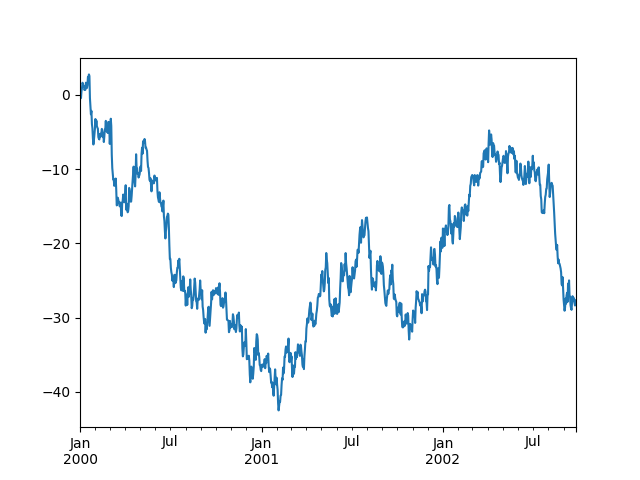

<Axes: >

In [81]:
ts = ts.cumsum()
ts.plot()

<IPython.core.display.Javascript object>


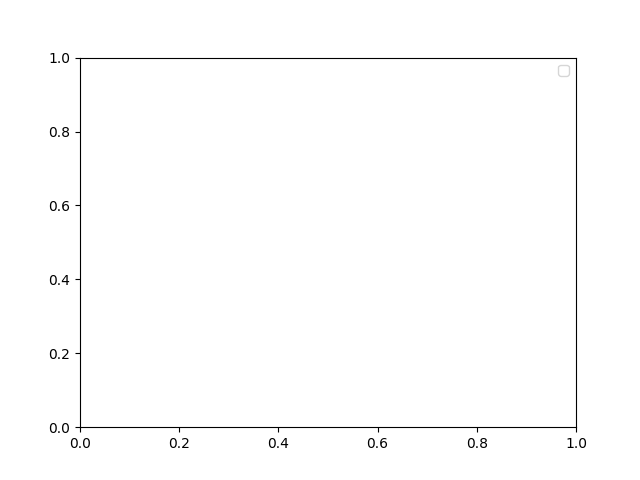

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<IPython.core.display.Javascript object>


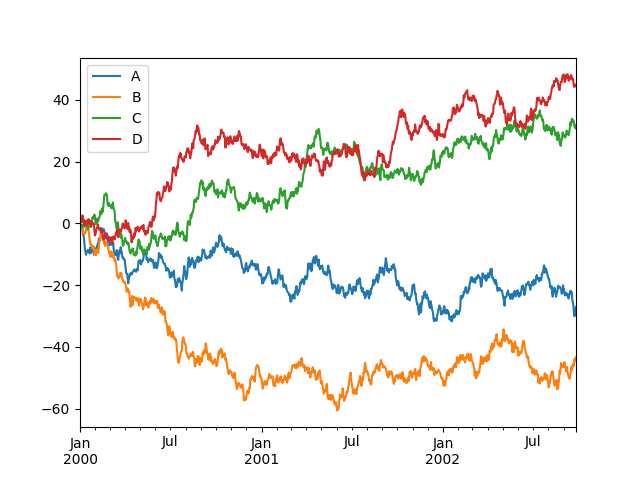

<Axes: >

In [82]:
df = pd.DataFrame(
    np.random.randn(1000, 4), index=ts.index, columns=["A", "B", "C", "D"]
)
df = df.cumsum()
plt.figure()

plt.legend()
df.plot()

# 导入数据

In [83]:
df.to_csv('')

FileNotFoundError: [Errno 2] No such file or directory: ''